In [10]:
!pip install matplotlib seaborn missingno

In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
# ===============================
# PHASE 2: DATA CLEANING
# ===============================

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sys
import os

In [35]:
path = os.path.abspath("../")
if(path not in sys.path):
    sys.path.append(path)

In [36]:
from src.Read_Any_File_Type import reading_data

# 1️⃣ Load Dataset
file_path = "../data/raw/Diabetes-Missing-Data.csv"  # update path if needed
data = reading_data(file_path)
df=data.read_data()

[SUCCESS] File loaded successfully: <class 'pandas.core.frame.DataFrame'>


In [37]:
from src.Data_Cleaning import cleaning_data
data_cleaner = cleaning_data()

=== MISSING VALUE SUMMARY ===
                   Missing Count  Missing %
Pregnant                       0       0.00
Glucose                        5       0.65
Diastolic_BP                  35       4.56
Skin_Fold                    227      29.56
Serum_Insulin                374      48.70
BMI                           11       1.43
Diabetes_Pedigree              0       0.00
Age                            0       0.00
Class                          0       0.00

Displaying missing value heatmap...


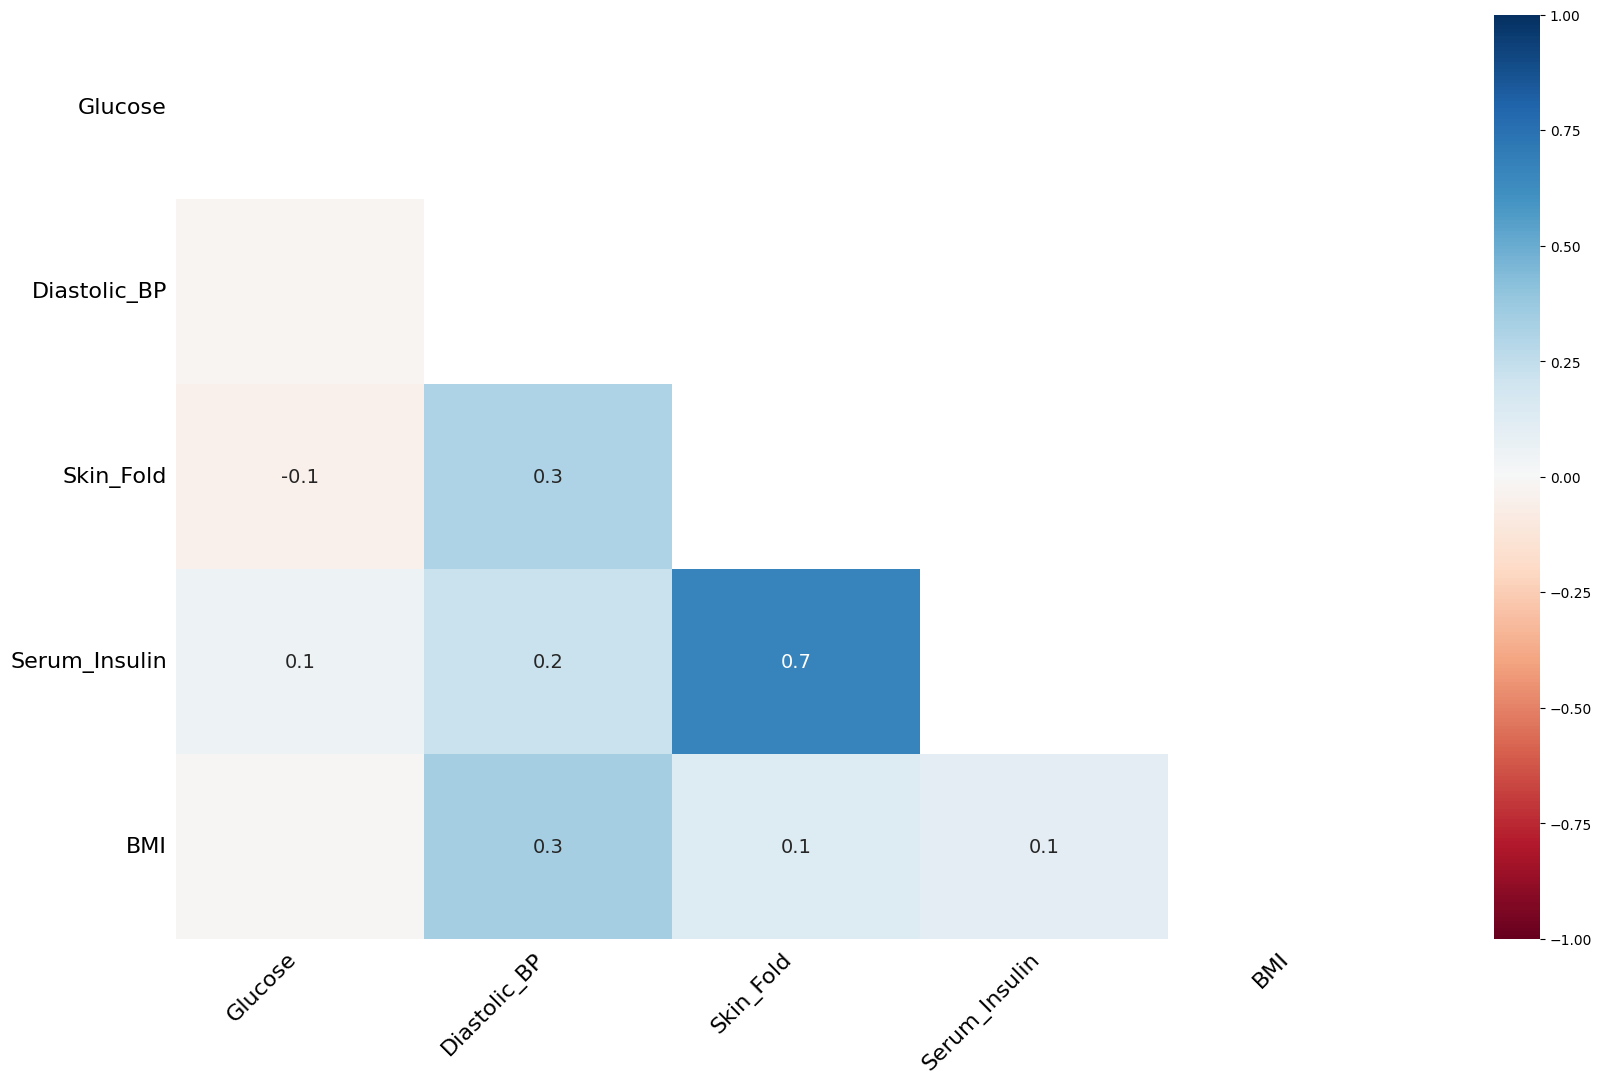

In [38]:
# =======================================================
# 1. MISSING VALUE ANALYSIS
# =======================================================

missing_summary,df = data_cleaner.missing_value_summary(df)
print("=== MISSING VALUE SUMMARY ===")
print(missing_summary)

# Visualize missing values using missingno
print("\nDisplaying missing value heatmap...")
msno.heatmap(df)
plt.show()

In [39]:
# =======================================================
# 2. IMPUTATION STRATEGY
# =======================================================

df = data_cleaner.impute_missing_values(df)

# Confirm missing values are handled
print("\n=== AFTER IMPUTATION - REMAINING MISSING VALUES ===")
print(df.isna().sum())


=== AFTER IMPUTATION - REMAINING MISSING VALUES ===
Pregnant             0
Glucose              0
Diastolic_BP         0
Skin_Fold            0
Serum_Insulin        0
BMI                  0
Diabetes_Pedigree    0
Age                  0
Class                0
dtype: int64


c:\Users\jops7\OneDrive\Documents\code\Data.S\Assaymenet\src\Data_Cleaning.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Glucose'].fillna(df['Glucose'].median(), inplace=True)
c:\Users\jops7\OneDrive\Documents\code\Data.S\Assaymenet\src\Data_Cleaning.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

Glucose: 0 outliers detected.
Diastolic_BP: 14 outliers detected.
Skin_Fold: 87 outliers detected.
Serum_Insulin: 346 outliers detected.
BMI: 8 outliers detected.

=== OUTLIER TREATMENT COMPLETE ===


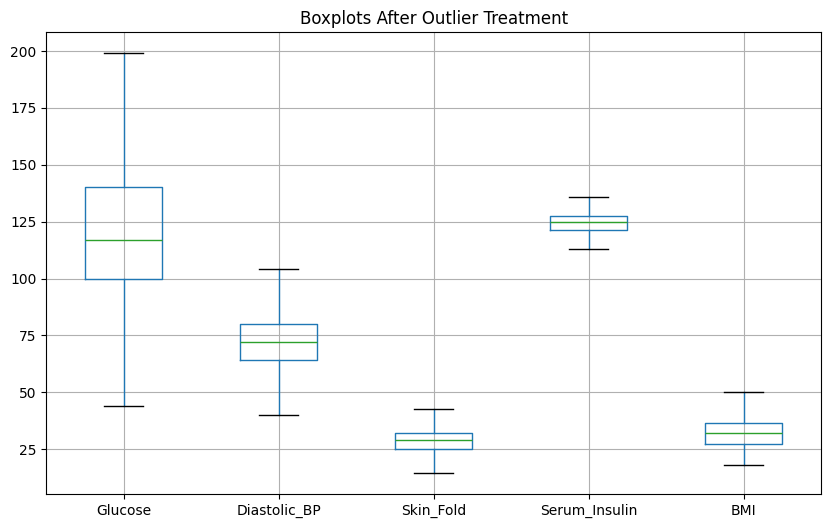

In [40]:
# =======================================================
# 3. OUTLIER DETECTION & TREATMENT
# =======================================================



# Apply to relevant numeric columns
num_cols = ['Glucose', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin', 'BMI']
for col in num_cols:
    df = data_cleaner.treat_outliers_iqr(df, col)

print("\n=== OUTLIER TREATMENT COMPLETE ===")

# Boxplots after treatment
plt.figure(figsize=(10,6))
df[num_cols].boxplot()
plt.title("Boxplots After Outlier Treatment")
plt.show()

In [41]:
# =======================================================
# FINAL CLEAN DATA SUMMARY
# =======================================================
print("\n=== CLEAN DATASET SUMMARY ===")
print(df.describe())

# Optionally save the cleaned dataset
df.to_csv("../data/interim/Diabetes-Cleaned.csv", index=False)
print("\n✅ Cleaned dataset saved as 'Diabetes-Cleaned.csv'")


=== CLEAN DATASET SUMMARY ===
         Pregnant     Glucose  Diastolic_BP   Skin_Fold  Serum_Insulin  \
count  768.000000  768.000000    768.000000  768.000000     768.000000   
mean     3.845052  121.656250     72.358073   28.866536     124.691081   
std      3.369578   30.438286     11.697097    7.442353       7.913595   
min      0.000000   44.000000     40.000000   14.500000     112.875000   
25%      1.000000   99.750000     64.000000   25.000000     121.500000   
50%      3.000000  117.000000     72.000000   29.000000     125.000000   
75%      6.000000  140.250000     80.000000   32.000000     127.250000   
max     17.000000  199.000000    104.000000   42.500000     135.875000   

              BMI  Diabetes_Pedigree         Age       Class  
count  768.000000         768.000000  768.000000  768.000000  
mean    32.393359           0.471876   33.240885    0.348958  
std      6.667471           0.331329   11.760232    0.476951  
min     18.200000           0.078000   21.000000  